# Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

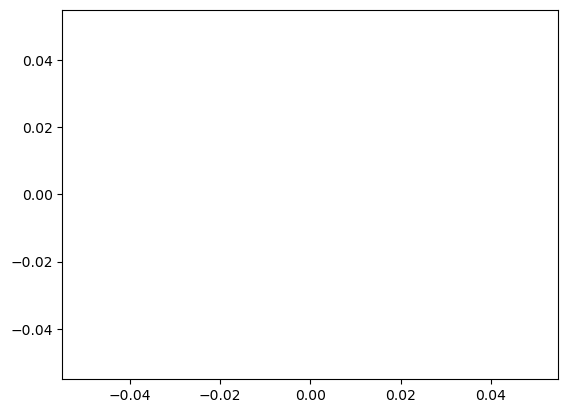

In [2]:
# Create a figure
plt.plot();

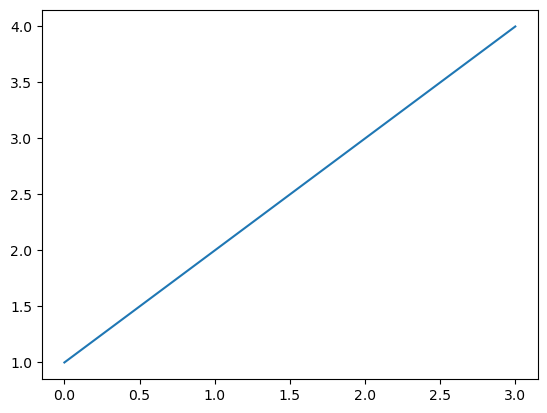

In [3]:
plt.plot([1, 2, 3, 4]);  # Notice the indices are on the x-axis and the array values are on the y-axis

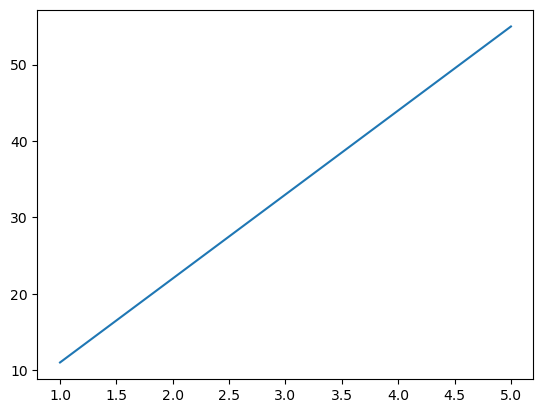

In [4]:
x = [1, 2, 4, 5]
y = [11, 22, 44, 55]
plt.plot(x, y);

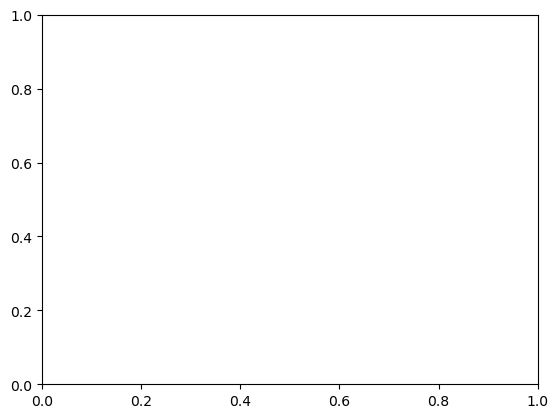

In [6]:
# 1st method (below is basically the longer version of plt.plot();):
fig = plt.figure()  # creates a figure
ax = fig.add_subplot()  # add some axes
plt.show()

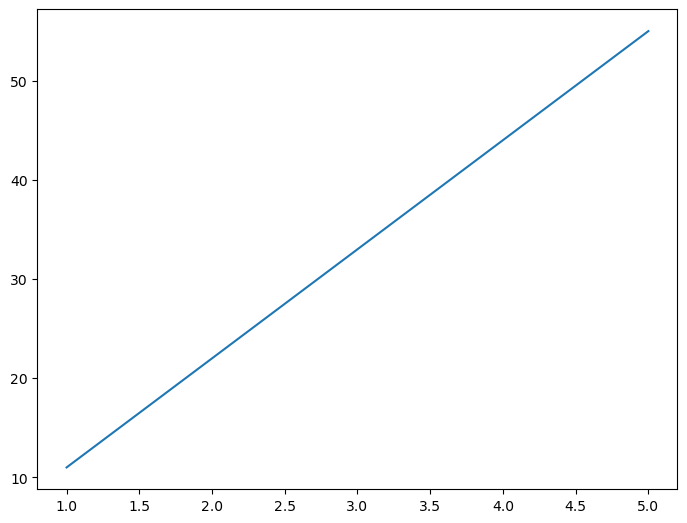

In [8]:
# 2nd method:
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

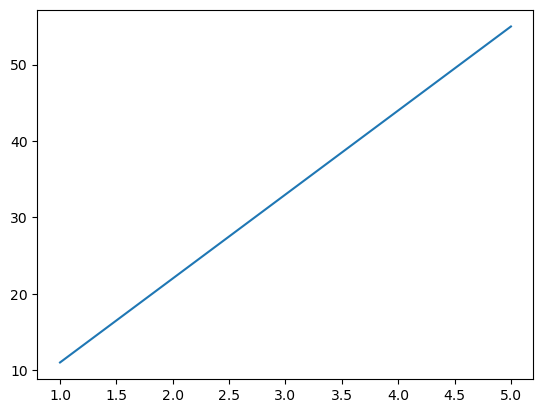

In [9]:
# 3rd method (recommended)
fig, ax = plt.subplots() # more than one plot coming out at the same time
ax.plot(x, y);  # add some data

# Matplotlib example workflow

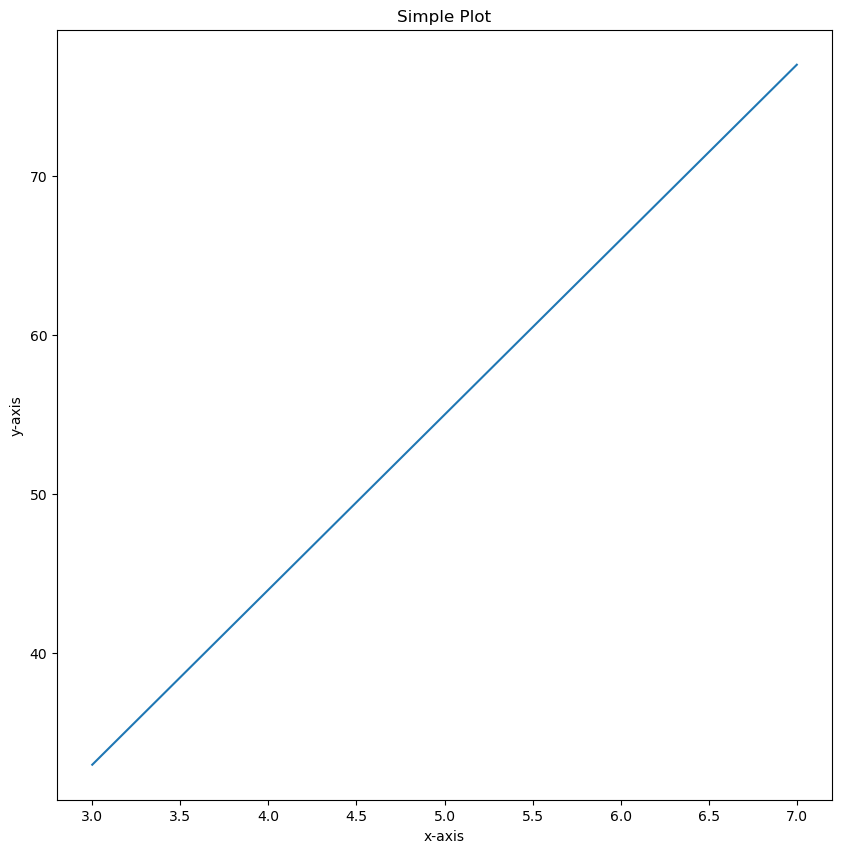

In [10]:
# 0). Import Matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1). Prepare data
x = [3,4,5,7]
y = [33, 44, 55, 77]

# 2). Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3). Plot data
ax.plot(x, y)

# 4). Customize plot
ax.set(title="Simple Plot",
       xlabel="x-axis",
       ylabel="y-axis")

# 5). Save and show (you save the whole figure
fig.savefig("images/sample_plot.png")



## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [11]:
import numpy as np

In [12]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

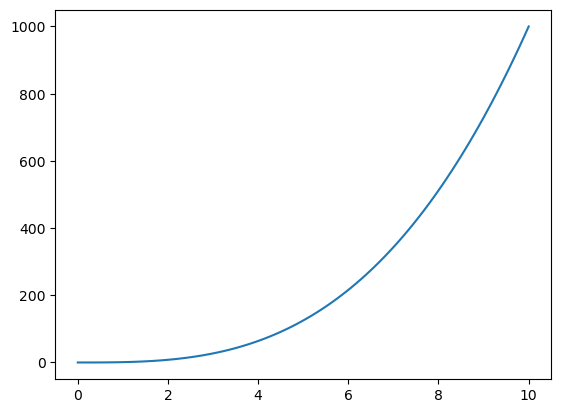

In [13]:
# Plot the data
fig, ax = plt.subplots()
ax.plot(x, x**3);

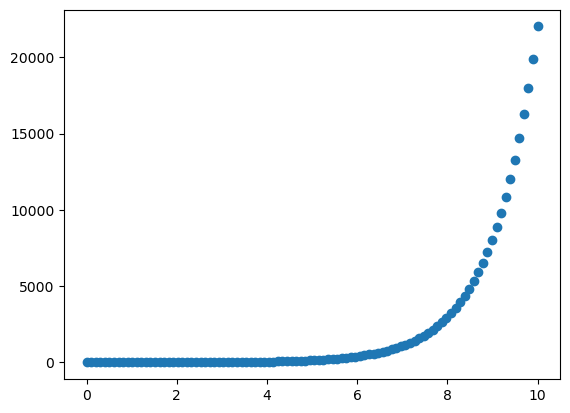

In [14]:
# Use the same data to make scatter plot:
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

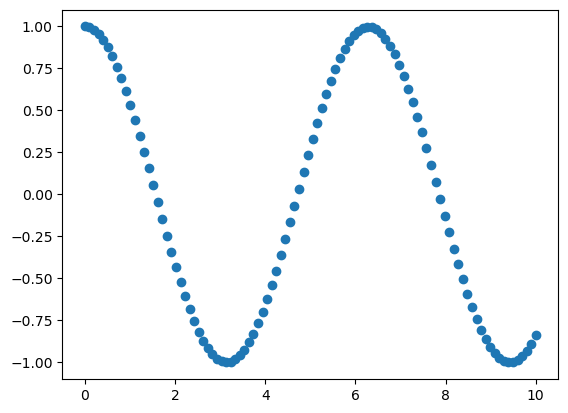

In [15]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.cos(x));

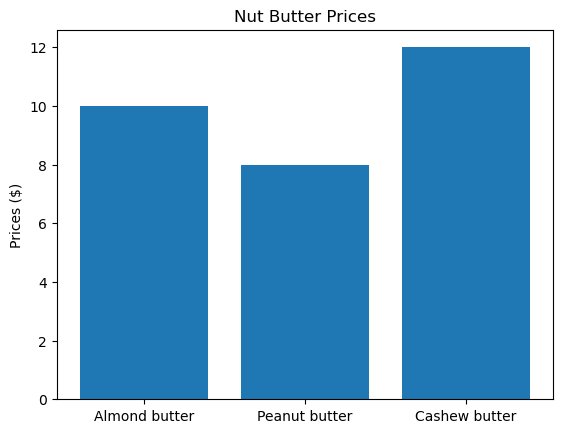

In [16]:
# Make a plot from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Nut Butter Prices",
       ylabel="Prices ($)");

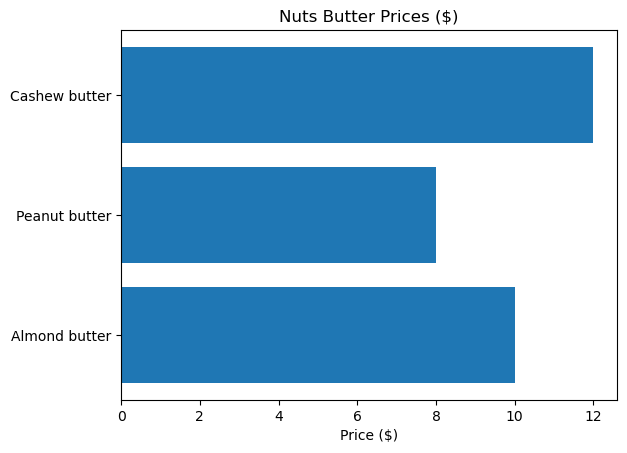

In [17]:
# Let's see horizontal bar graph
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))
ax.set(title="Nuts Butter Prices ($)",
       xlabel="Price ($)");

## Histograms

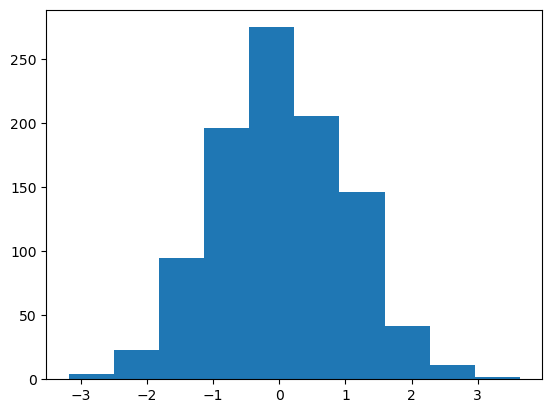

In [18]:
# Let's make some data for histogram and plot them
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

## Two options for subplots

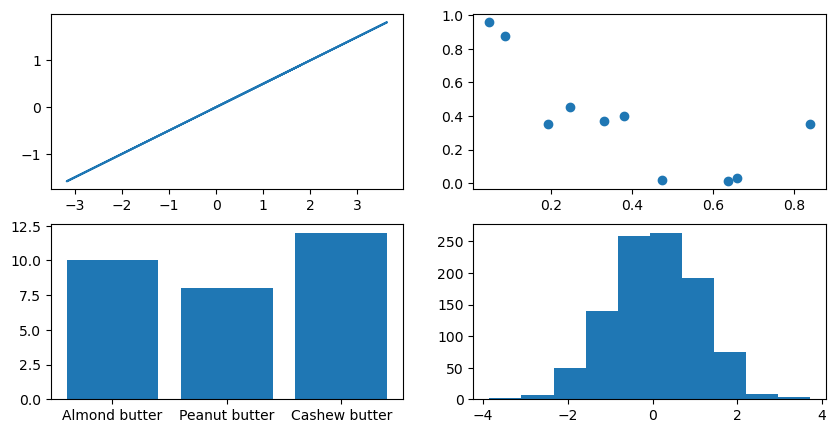

In [19]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10,5))
# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

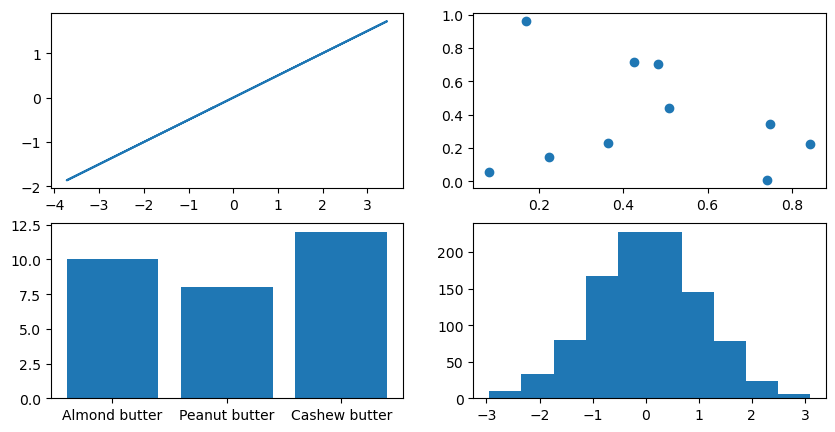

In [41]:
# Subplots for option 2:
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10,5))
# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from Pandas DataFrame

In [20]:
import pandas as pd

In [21]:
# Make a dataframe
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


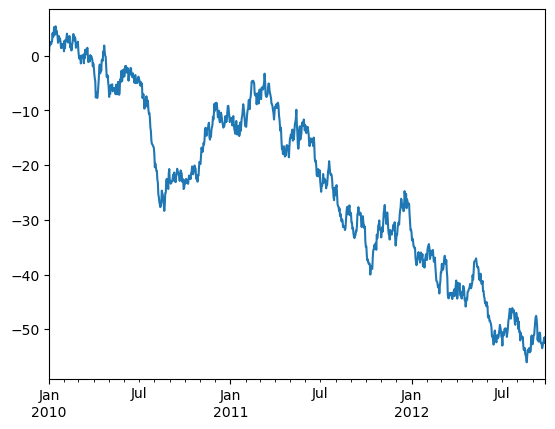

In [22]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range("1/1/2010", periods=1000))
ts = ts.cumsum()
ts.plot();

In [23]:
# Now, format our Price column so that it contains integers
car_sales["Price"] = car_sales["Price"].str.replace("[$,]", "", regex=True).astype(float).astype(int)
car_sales
                            

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [24]:
# Add a sale date column to car_sales
car_sales["Sale Date"]= pd.date_range("01/01/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [25]:
# Add a column to calculate the total car sold
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


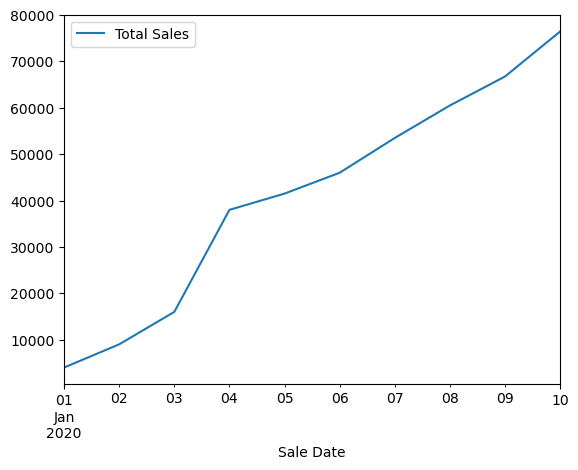

In [26]:
# Let's plot the Total Sales
car_sales.plot(x="Sale Date", y="Total Sales");

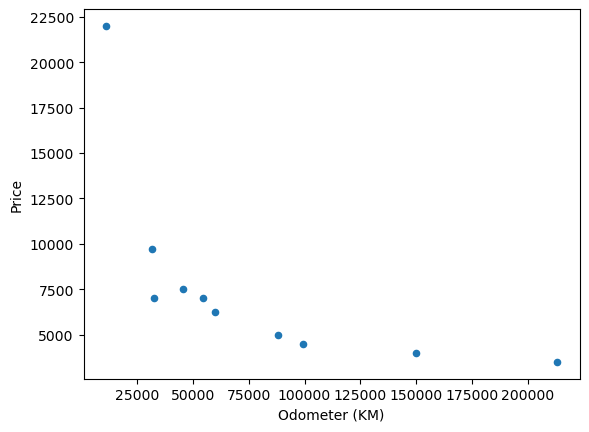

In [27]:
# Let's plot Car Prices vs Odometer
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [29]:
# Let's do a bar graph
x = np.random.rand(10, 4)
x

# Turn it into a DataFrame
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.540110,0.142113,0.890695,0.532963
1,0.783294,0.380107,0.532959,0.601599
2,0.990538,0.242428,0.384449,0.747784
3,0.190945,0.880491,0.636783,0.042302
4,0.669279,0.809686,0.919643,0.819788
5,0.761876,0.242577,0.636069,0.795455
6,0.448573,0.742147,0.205768,0.314337
7,0.584425,0.473446,0.699844,0.664521
8,0.876370,0.699289,0.529256,0.072188
9,0.661914,0.718986,0.897835,0.714452


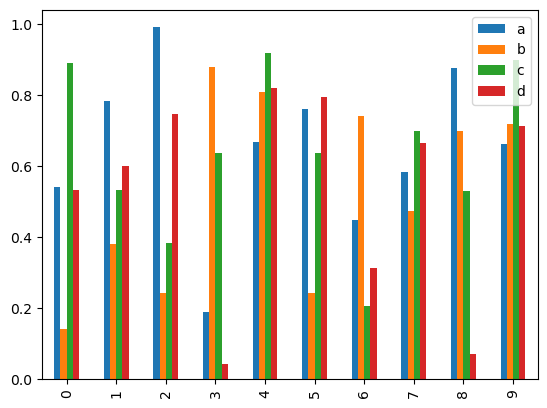

In [30]:
# Now the bar graph:
df.plot.bar();

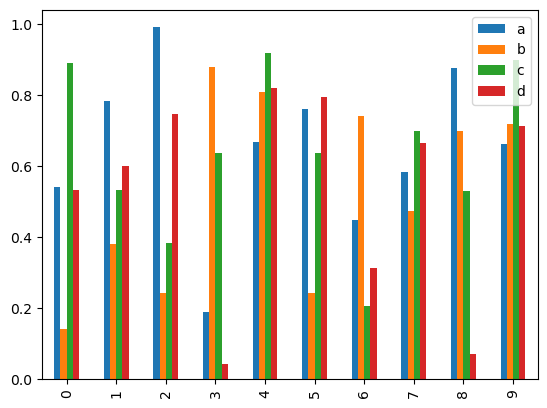

In [31]:
# Another way to generate the same plot is:
df.plot(kind="bar");

In [32]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


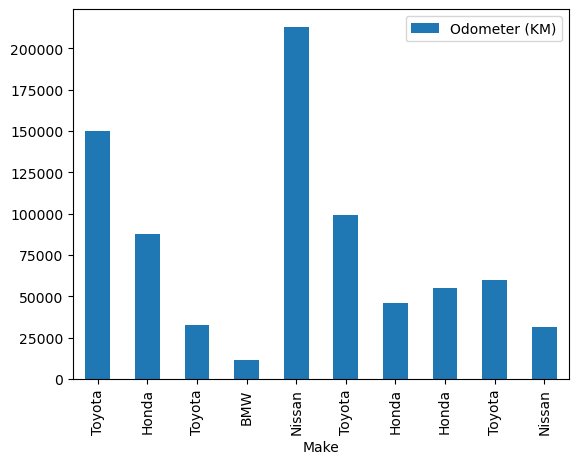

In [33]:
# Let's use our car_sales DataFrame to generate a bar graph
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

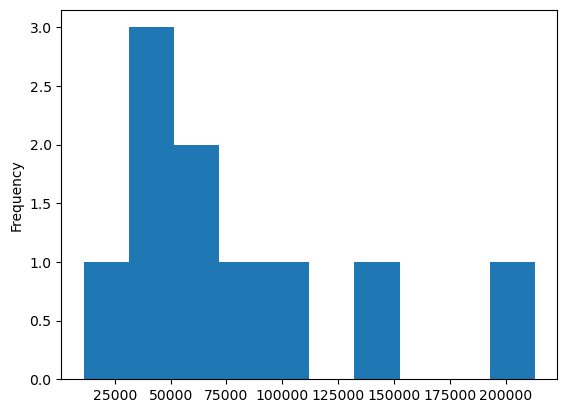

In [34]:
# Let's do a histogram
car_sales["Odometer (KM)"].plot.hist();

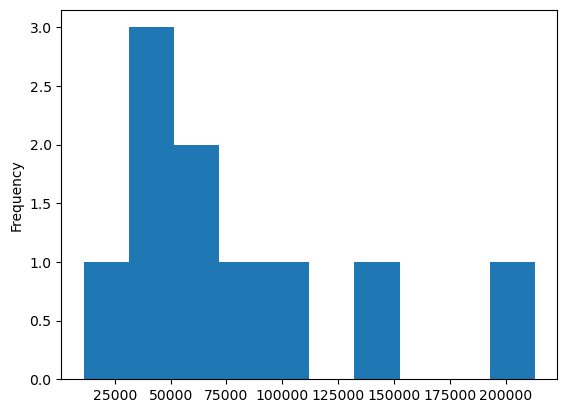

In [35]:
# Another way to do histogram:
car_sales["Odometer (KM)"].plot(kind="hist");

In [36]:
# Let's try working with the heart disease data set:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


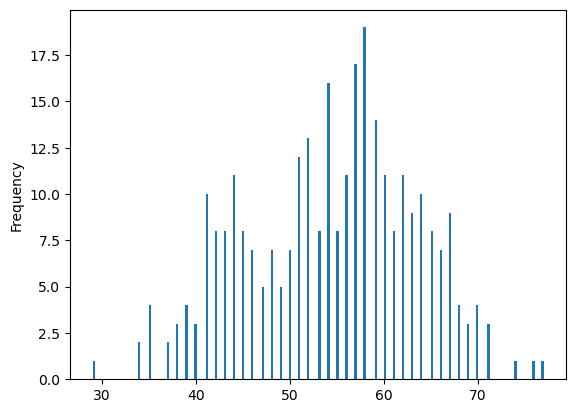

In [38]:
# Create a histogram of age:
heart_disease['age'].plot.hist(bins=200);

In [39]:
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


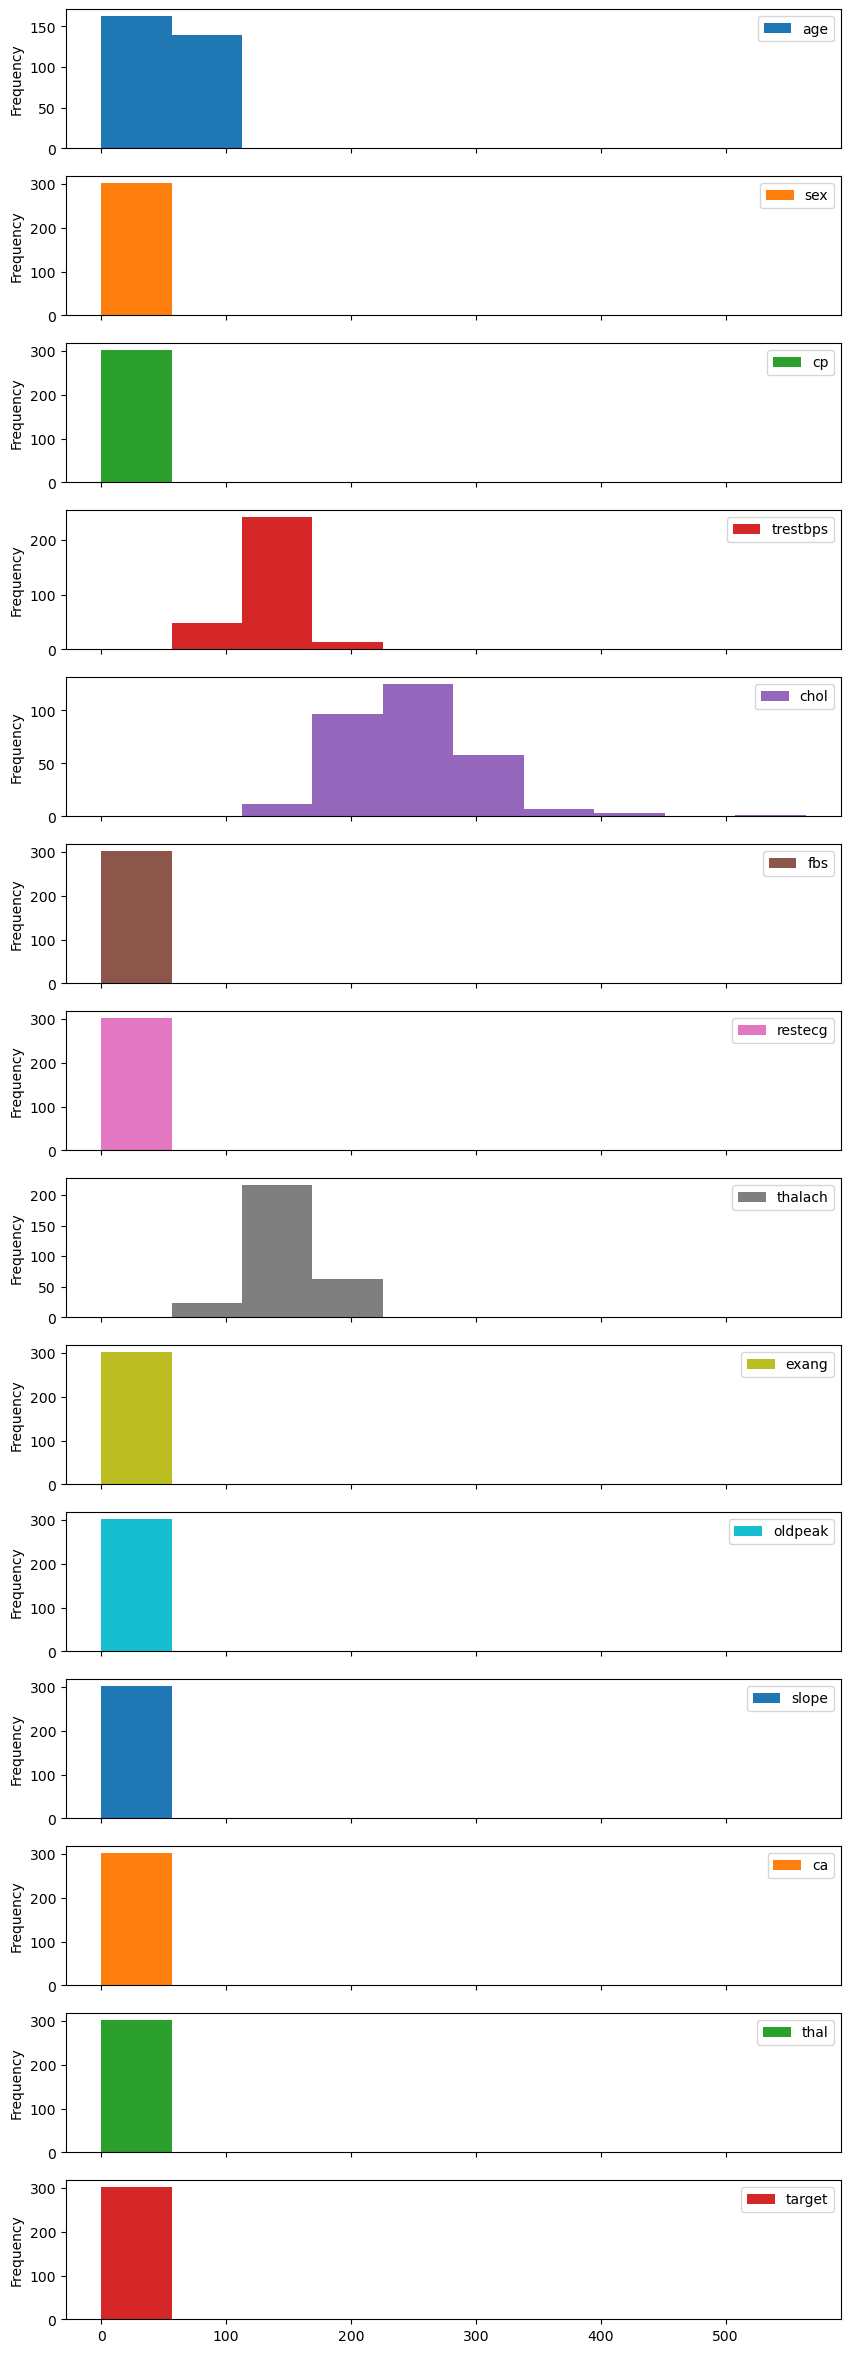

In [40]:
heart_disease.plot.hist(figsize=(10,30),subplots=True);

### Which one should you use?  (pyplot vs matplotlib OO method?

- When plotting something quickly, okay to use the pyplot method
- When plotting something more advanced, use the OO method

In [44]:
# Let's get a subset of patients over 50 from the heart disease csv
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


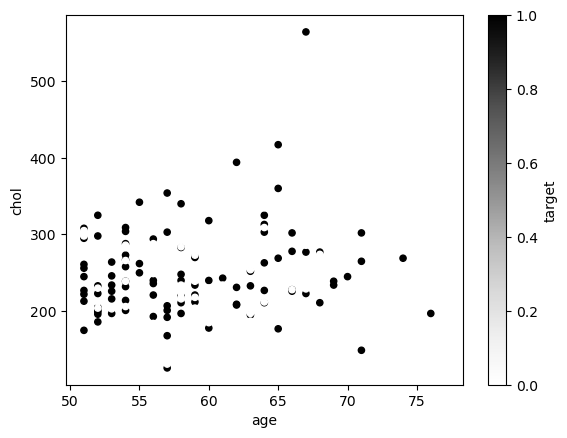

In [45]:
# Let's do a scatter plot with the pyplot method
over_50.plot(kind="scatter",
             x='age',
             y='chol',
             c='target');

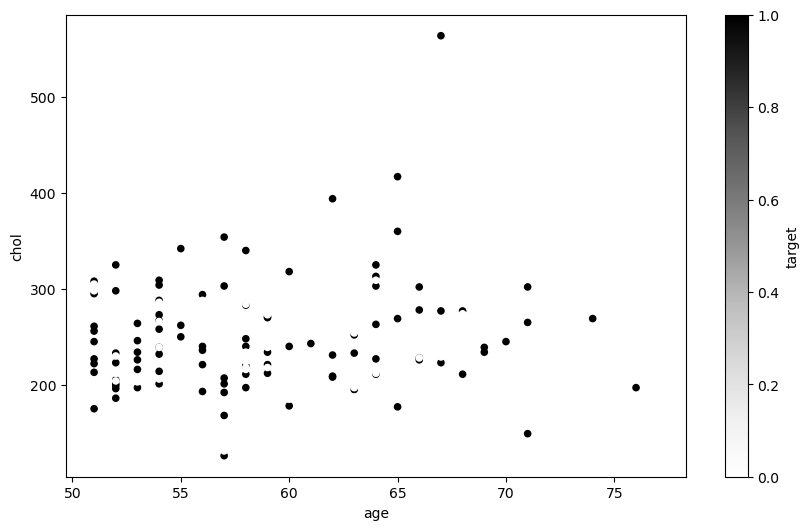

In [48]:
# Scatter plot using sort of like a hybrid method (OO with pyplot)
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax);
# ax.set_xlim([45,100]) - if you want the x-axis to be from 45 to 100

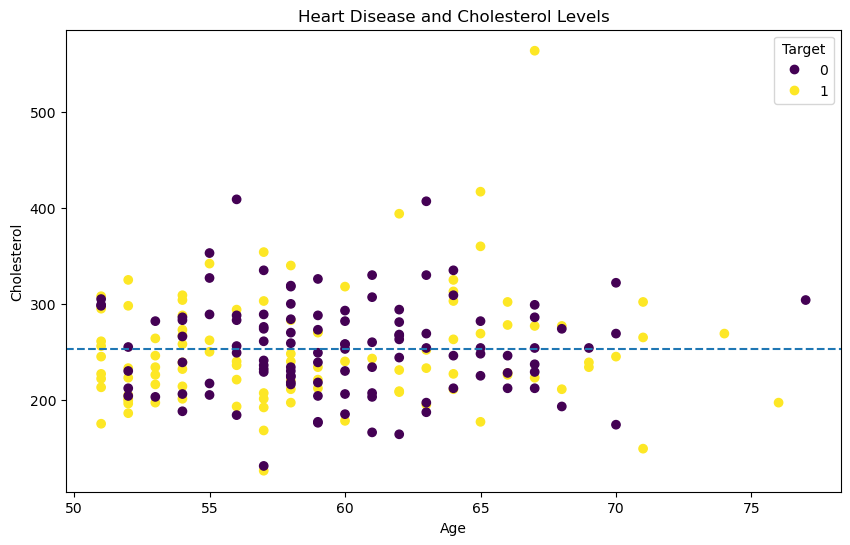

In [53]:
# Scatter plot using the OO method from scratch:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50['age'],
                     y=over_50['chol'],
                     c=over_50['target']);
# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title ="Target");

#Add a horizontal rule
ax.axhline(over_50["chol"].mean(), linestyle='--');

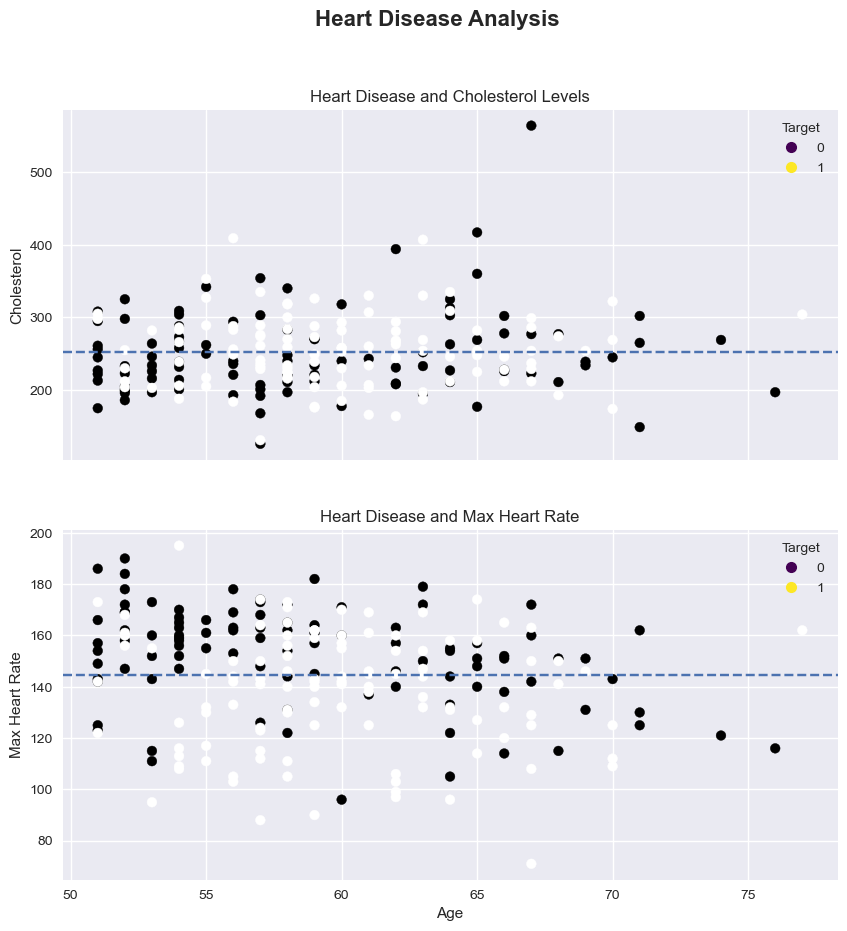

In [85]:

# subplots of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10),
                               sharex=True)

# Add data to ax0
chol_scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"])

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline to ax0
ax0.axhline(y=over_50["chol"].mean(),
            linestyle="--");

# Add data to ax1
thalach_scatter = ax1.scatter(x=over_50["age"],
                              y=over_50["thalach"],
                              c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Add a legend for ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline to ax1
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

## Customizing matplotlib plots and getting stylish

In [63]:
# See the different styles available
plt.style.available 

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [64]:
car_sales.head(10)

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


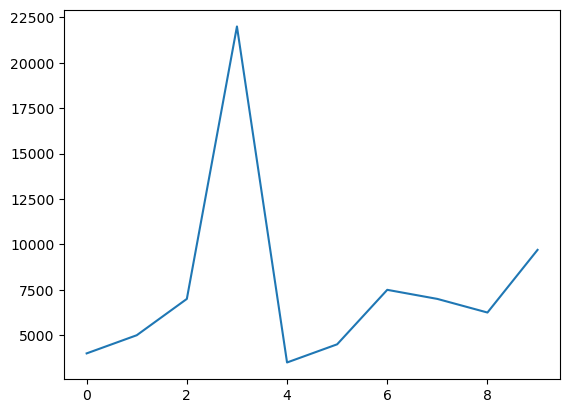

In [65]:
car_sales['Price'].plot();

In [67]:
plt.style.use('seaborn-v0_8-whitegrid');

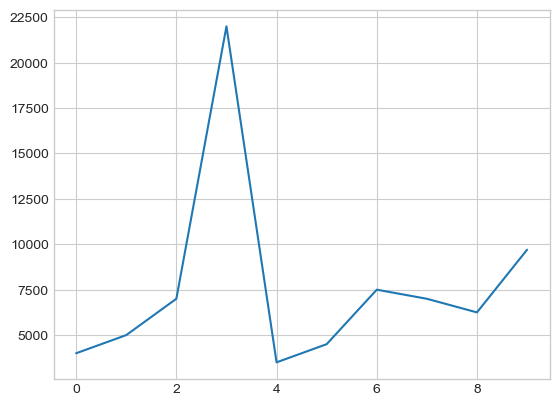

In [68]:
car_sales["Price"].plot();

In [70]:
plt.style.use('seaborn-v0_8');

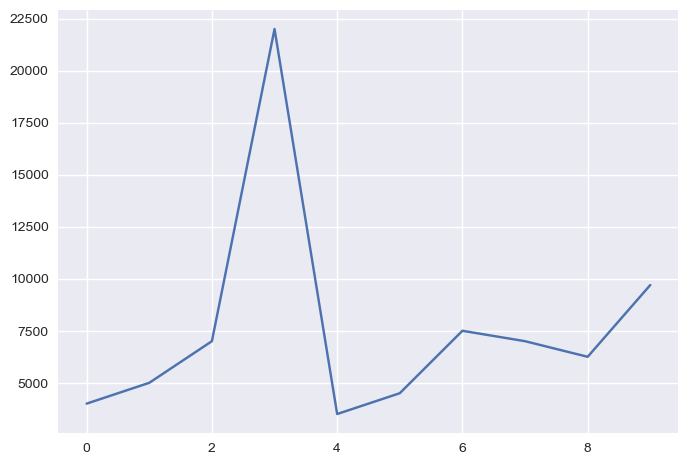

In [71]:
car_sales['Price'].plot();

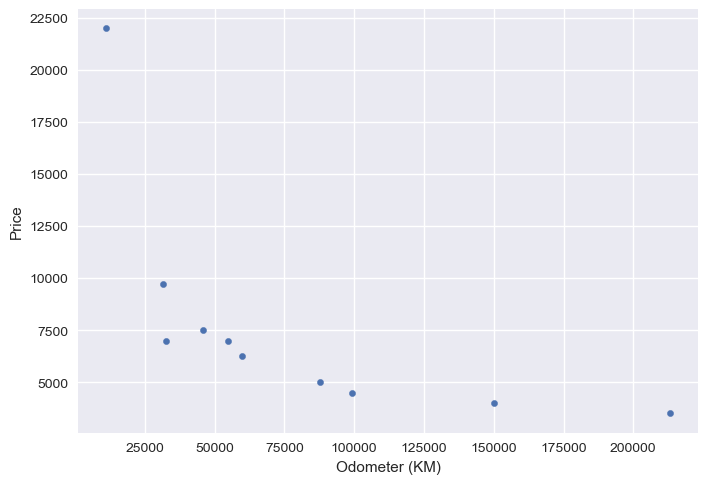

In [73]:
car_sales.plot(x="Odometer (KM)",
               y="Price",
               kind="scatter");

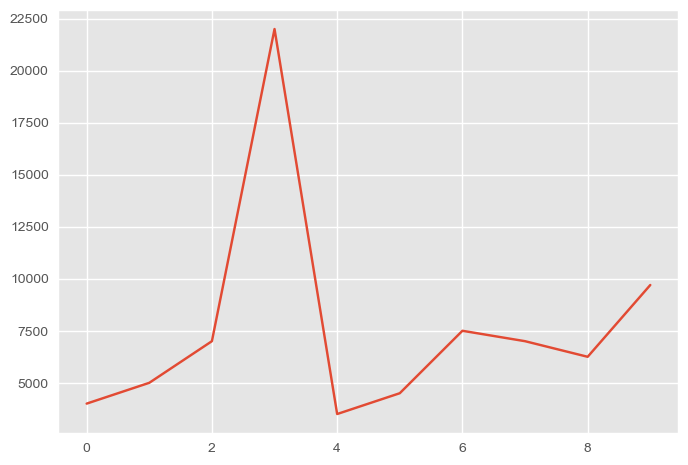

In [74]:
plt.style.use('ggplot');
car_sales['Price'].plot();

In [75]:
# Create some dummy data
x = np.random.randn(10, 4)
x

array([[ 2.42770063,  0.69757478,  0.05294735,  1.03237915],
       [-0.34230086,  0.59271758,  1.71526122,  0.5124959 ],
       [-1.16117605, -0.19712131, -0.31331619, -2.45144705],
       [-1.36636995, -1.09208125, -1.12109075, -1.44030996],
       [-1.00269684,  0.62294458, -0.65019229, -0.4061146 ],
       [ 0.00997165, -0.03534162,  1.10471954, -0.78179741],
       [-0.95480043, -1.3491887 , -0.06850657,  0.40080544],
       [-0.29988539,  0.76248673,  0.57994941,  0.560512  ],
       [-0.13932622,  0.3342376 ,  1.70514575,  1.47084765],
       [ 0.33267975, -1.71707222,  2.35238231, -1.03722825]])

In [76]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,2.427701,0.697575,0.052947,1.032379
1,-0.342301,0.592718,1.715261,0.512496
2,-1.161176,-0.197121,-0.313316,-2.451447
3,-1.366370,-1.092081,-1.121091,-1.440310
4,-1.002697,0.622945,-0.650192,-0.406115
5,0.009972,-0.035342,1.104720,-0.781797
6,-0.954800,-1.349189,-0.068507,0.400805
7,-0.299885,0.762487,0.579949,0.560512
8,-0.139326,0.334238,1.705146,1.470848
9,0.332680,-1.717072,2.352382,-1.037228


matplotlib.axes._axes.Axes

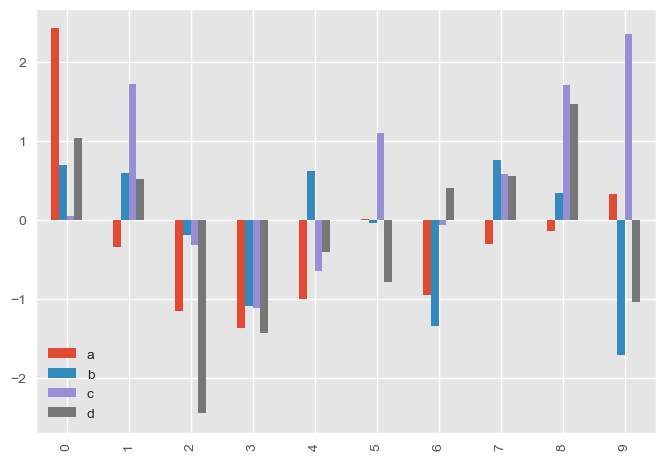

In [77]:
ax = df.plot(kind='bar');
type(ax)

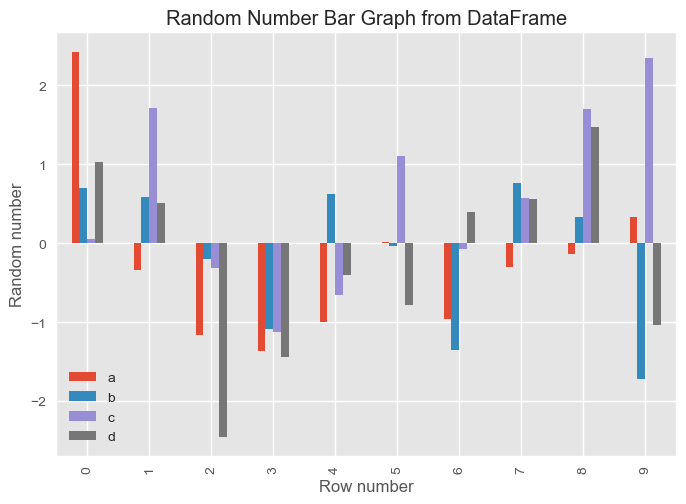

In [81]:
# Customize our plot with the set() method
ax = df.plot(kind="bar")
# Add some labels and a title
ax.set(title="Random Number Bar Graph from DataFrame",
       xlabel="Row number",
       ylabel="Random number");

# Make the legend visible
ax.legend().set_visible(True)

In [87]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

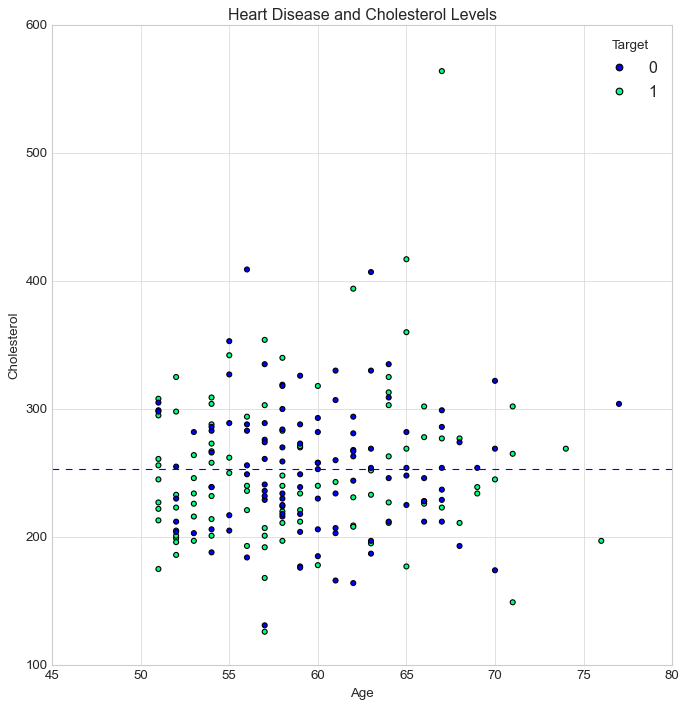

In [95]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# Scatter plot using the OO method from scratch:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data
scatter = ax.scatter(x=over_50['age'],
                     y=over_50['chol'],
                     c=over_50['target'],
                     cmap="winter");
# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title ="Target");

#Add a horizontal rule
ax.axhline(over_50["chol"].mean(), linestyle='--');

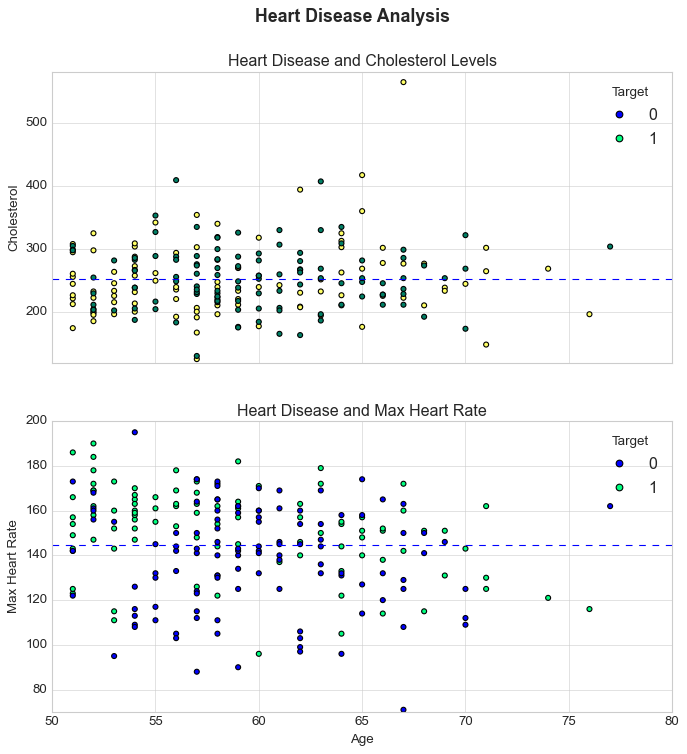

In [101]:

# subplots of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10),
                               sharex=True)

# Add data to ax0
chol_scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                      cmap="summer")

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Change the axis limits
ax0.set_xlim([50, 80])
ax0.set_ylim([120, 580])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline to ax0
ax0.axhline(y=over_50["chol"].mean(),
            linestyle="--");

# Add data to ax1
thalach_scatter = ax1.scatter(x=over_50["age"],
                              y=over_50["thalach"],
                              c=over_50["target"],
                              cmap="winter")

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Change ax1 axis limits
ax1.set_xlim([50, 80])
ax1.set_ylim([70, 200])

# Add a legend for ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline to ax1
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");